In [40]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
df = pd.read_csv('car_price_prediction_cleaned_data.csv')

In [42]:
df.shape

(1000000, 20)

In [43]:
df.head()

,make,model,year,mileage,engine_hp,transmission,fuel_type,drivetrain,body_type,exterior_color,interior_color,owner_count,accident_history,seller_type,condition,trim,vehicle_age,mileage_per_year,brand_popularity,price
0,Volkswagen,Jetta,2016,183903,173,Manual,Electric,RWD,Sedan,Blue,Brown,5,Unknown,Dealer,Excellent,EX,9,20433.666667,0.040054,7208.52
1,Lexus,RX,2010,236643,352,Manual,Gasoline,FWD,Sedan,Silver,Beige,5,Minor,Dealer,Good,LX,15,15776.200000,0.039921,6911.81
2,Subaru,Crosstrek,2016,103199,188,Automatic,Diesel,AWD,Sedan,Silver,Beige,5,Unknown,Dealer,Excellent,Touring,9,11466.555556,0.040230,11915.63
3,Cadillac,Lyriq,2016,118889,338,Manual,Gasoline,AWD,SUV,Black,Gray,3,Unknown,Private,Good,Base,9,13209.888889,0.039847,25984.79
4,Toyota,Highlander,2018,204170,196,Manual,Diesel,FWD,Sedan,Red,Brown,5,Minor,Dealer,Excellent,Sport,7,29167.142857,0.039627,8151.30


In [44]:
df.isnull().sum()

make                0
model               0
year                0
mileage             0
engine_hp           0
transmission        0
fuel_type           0
drivetrain          0
body_type           0
exterior_color      0
interior_color      0
owner_count         0
accident_history    0
seller_type         0
condition           0
trim                0
vehicle_age         0
mileage_per_year    0
brand_popularity    0
price               0
dtype: int64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 20 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   make              1000000 non-null  object 
 1   model             1000000 non-null  object 
 2   year              1000000 non-null  int64  
 3   mileage           1000000 non-null  int64  
 4   engine_hp         1000000 non-null  int64  
 5   transmission      1000000 non-null  object 
 6   fuel_type         1000000 non-null  object 
 7   drivetrain        1000000 non-null  object 
 8   body_type         1000000 non-null  object 
 9   exterior_color    1000000 non-null  object 
 10  interior_color    1000000 non-null  object 
 11  owner_count       1000000 non-null  int64  
 12  accident_history  1000000 non-null  object 
 13  seller_type       1000000 non-null  object 
 14  condition         1000000 non-null  object 
 15  trim              1000000 non-null  object 
 16  v

In [46]:
df.nunique()

make                    25
model                  105
year                    26
mileage             257043
engine_hp              478
transmission             2
fuel_type                3
drivetrain               3
body_type                7
exterior_color           6
interior_color           4
owner_count              5
accident_history         3
seller_type              2
condition                3
trim                     6
vehicle_age             25
mileage_per_year    522677
brand_popularity        24
price               850936
dtype: int64

## Deep Exploratory Data Analysis (EDA)

### Separate numerical & categorical columns

In [47]:

num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

num_cols, cat_cols

(Index(['year', 'mileage', 'engine_hp', 'owner_count', 'vehicle_age',
        'mileage_per_year', 'brand_popularity', 'price'],
       dtype='object'),
 Index(['make', 'model', 'transmission', 'fuel_type', 'drivetrain', 'body_type',
        'exterior_color', 'interior_color', 'accident_history', 'seller_type',
        'condition', 'trim'],
       dtype='object'))

In [48]:
## Correlation of PRICE with ALL numerical features

In [49]:
corr_with_price = (
    df[num_cols]
    .corr()['price']
    .sort_values(ascending=False)
)

corr_with_price


price               1.000000
year                0.664730
engine_hp           0.653339
brand_popularity    0.055940
mileage_per_year   -0.216451
owner_count        -0.449437
mileage            -0.618349
vehicle_age        -0.662811
Name: price, dtype: float64

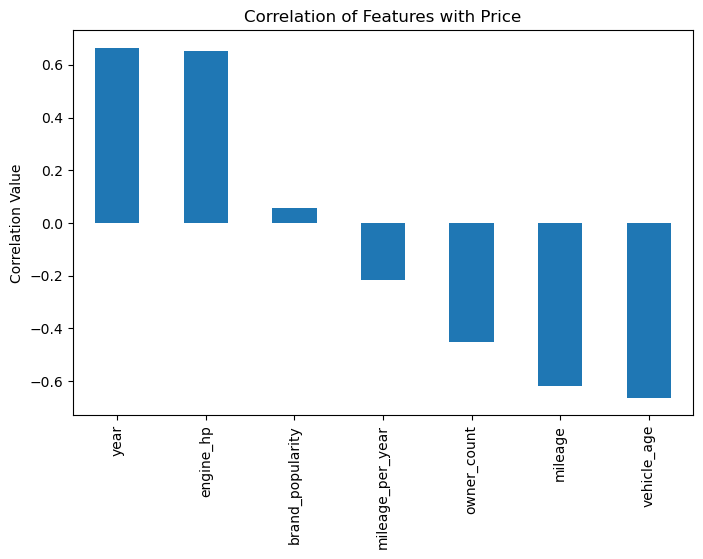

In [50]:
plt.figure(figsize=(8,5))
corr_with_price.drop('price').plot(kind='bar')
plt.title("Correlation of Features with Price")
plt.ylabel("Correlation Value")
plt.show()


In [51]:
##Select HIGH correlation features (threshold-based)

In [52]:
high_corr_features = corr_with_price[
    abs(corr_with_price) >= 0.2
].index

high_corr_features


Index(['price', 'year', 'engine_hp', 'mileage_per_year', 'owner_count',
       'mileage', 'vehicle_age'],
      dtype='object')

In [53]:
df[['price', 'mileage', 'engine_hp', 'vehicle_age']].describe()


,price,mileage,engine_hp,vehicle_age
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,20329.302593,112660.126464,235.664301,7.585987
std,13644.467189,72088.236925,93.614773,3.829534
min,1500.000000,500.000000,90.000000,1.000000
25%,10324.527500,57654.000000,162.000000,5.000000
50%,17864.740000,103331.000000,215.000000,7.000000
75%,27601.402500,157865.000000,300.000000,10.000000
max,93422.090000,300000.000000,581.000000,25.000000


In [54]:
## Plot relationships ONLY for high-impact features

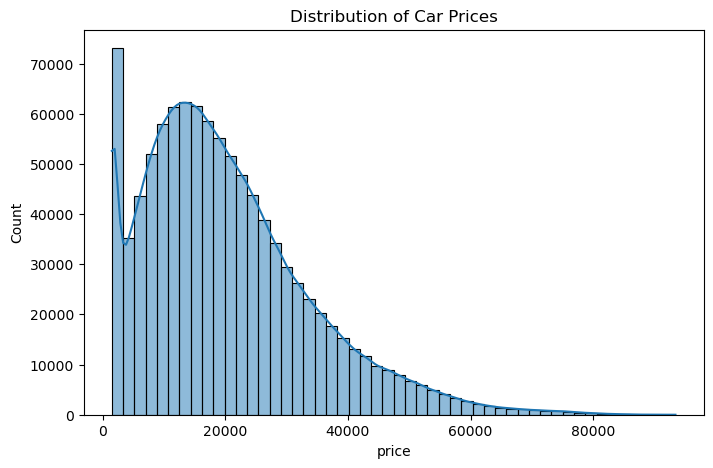

In [55]:
plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Distribution of Car Prices")
plt.show()


In [56]:
#Insight:

#Right-skewed distribution
#Few expensive cars
#Most cars fall in a practical resale range

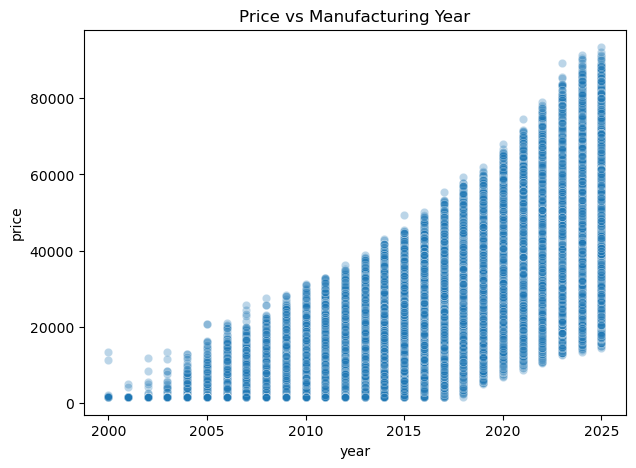

In [57]:
# Price vs Year
plt.figure(figsize=(7,5))
sns.scatterplot(
    x='year',
    y='price',
    data=df,
    alpha=0.3
)
plt.title("Price vs Manufacturing Year")
plt.show()


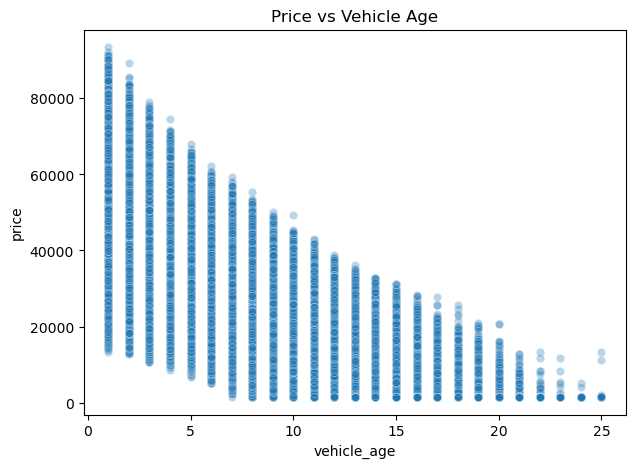

In [58]:
#4. Price vs Vehicle Age (VERY IMPORTANT)
plt.figure(figsize=(7,5))
sns.scatterplot(
    x='vehicle_age',
    y='price',
    data=df,
    alpha=0.3
)
plt.title("Price vs Vehicle Age")
plt.show()


In [59]:
#As car age increases → price decreases
#Strong negative relationship

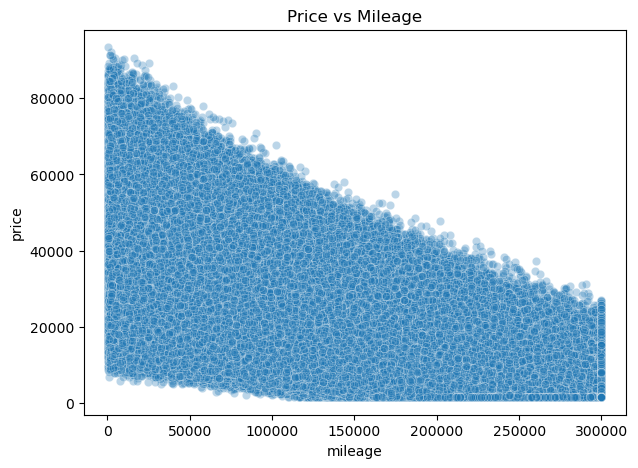

In [60]:
#Price vs Mileage
plt.figure(figsize=(7,5))
sns.scatterplot(
    x='mileage',
    y='price',
    data=df,
    alpha=0.3
)
plt.title("Price vs Mileage")
plt.show()


In [61]:
#Insight:

#Higher mileage → lower resale price
#Outliers exist (luxury cars, well-maintained cars)

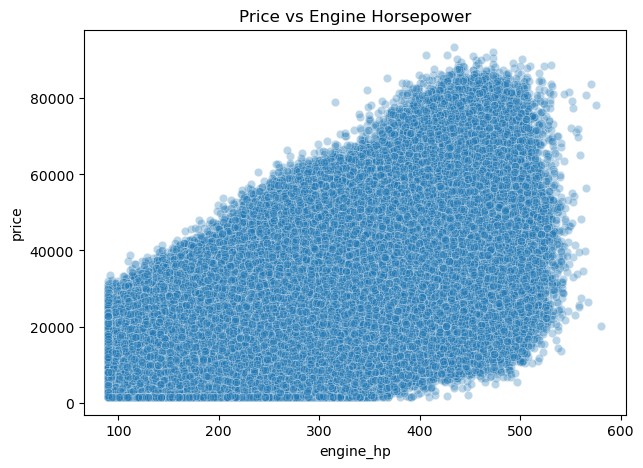

In [62]:
#Price vs Engine Horsepower
plt.figure(figsize=(7,5))
sns.scatterplot(
    x='engine_hp',
    y='price',
    data=df,
    alpha=0.3
)
plt.title("Price vs Engine Horsepower")
plt.show()


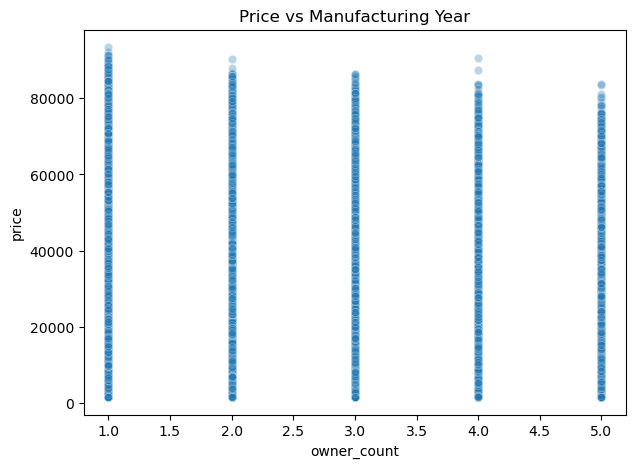

In [63]:
# Price vs Owner Count
plt.figure(figsize=(7,5))
sns.scatterplot(
    x='owner_count',
    y='price',
    data=df,
    alpha=0.3
)
plt.title("Price vs Manufacturing Year")
plt.show()

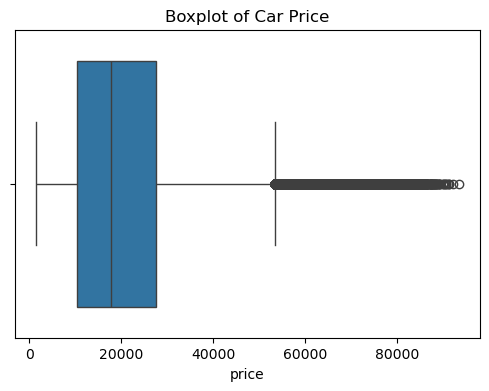

In [64]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['price'])
plt.title("Boxplot of Car Price")
plt.show()

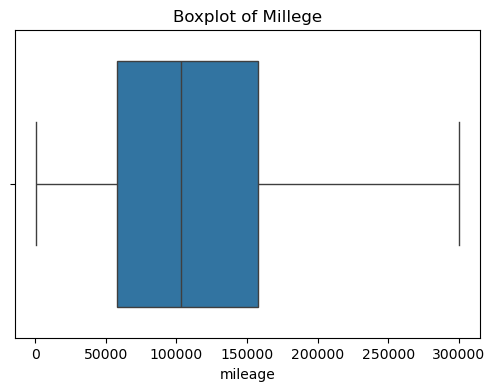

In [65]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['mileage'])
plt.title("Boxplot of Millege")
plt.show()

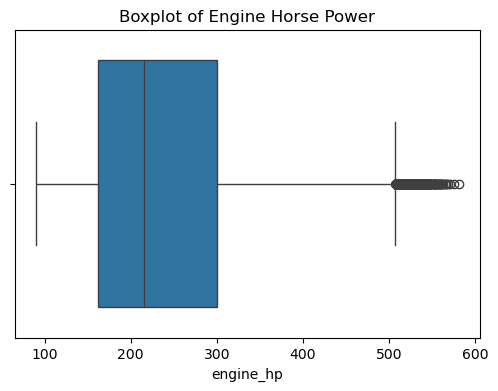

In [66]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['engine_hp'])
plt.title("Boxplot of Engine Horse Power")
plt.show()

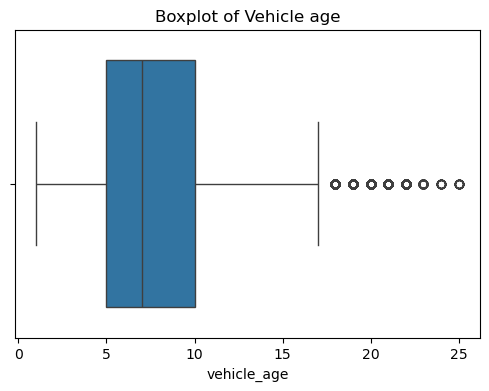

In [67]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['vehicle_age'])
plt.title("Boxplot of Vehicle age")
plt.show()

#### Categorical variables vs Price (Boxplots)

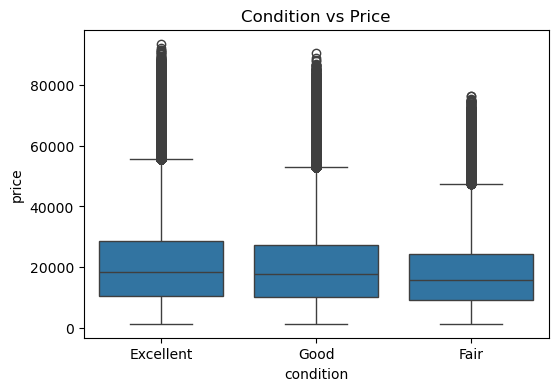

In [68]:
plt.figure(figsize=(6,4))
sns.boxplot(
    x='condition',
    y='price',
    data=df
)
plt.title("Condition vs Price")
plt.show()


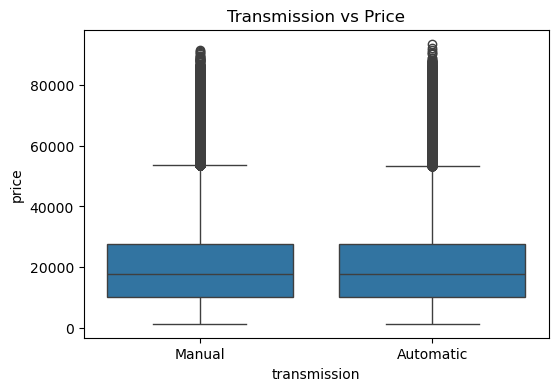

In [69]:
#Transmission vs Price
plt.figure(figsize=(6,4))
sns.boxplot(
    x='transmission',
    y='price',
    data=df
)
plt.title("Transmission vs Price")
plt.show()

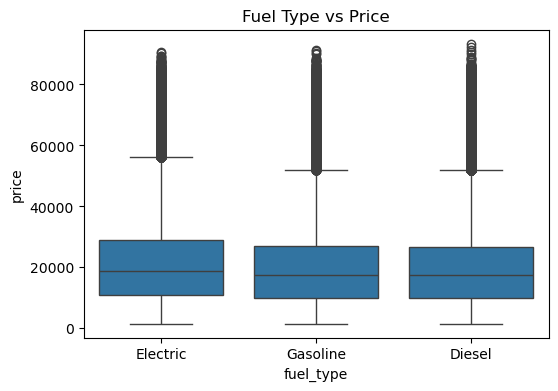

In [70]:
###Fuel Type vs Price
plt.figure(figsize=(6,4))
sns.boxplot(
    x='fuel_type',
    y='price',
    data=df
)
plt.title("Fuel Type vs Price")
plt.show()

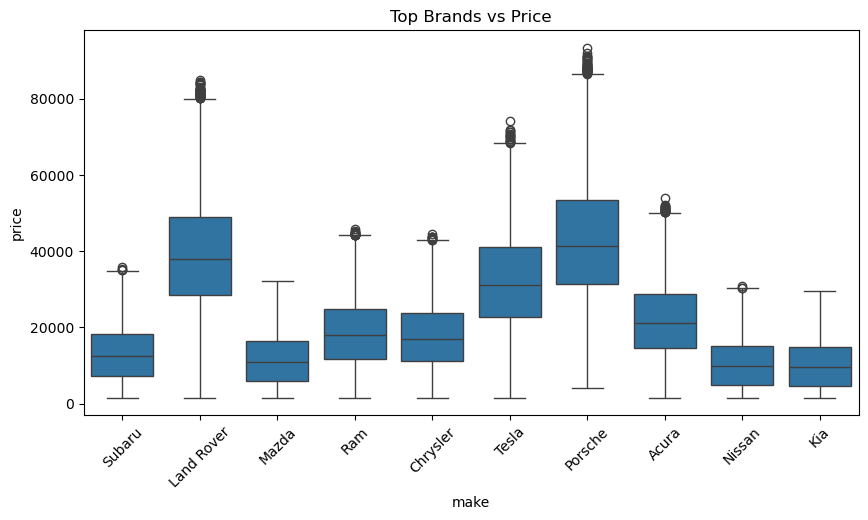

In [71]:
##Brand effect (Make)
top_makes = df['make'].value_counts().head(10).index

plt.figure(figsize=(10,5))
sns.boxplot(
    x='make',
    y='price',
    data=df[df['make'].isin(top_makes)]
)
plt.xticks(rotation=45)
plt.title("Top Brands vs Price")
plt.show()

### Handling Make (Top 20) and Model (Top 3–4 per Make) based on price influence

In [72]:
#Select Top 15 Makes by frequency
top_makes = df['make'].value_counts().head(20).index.tolist()
top_makes


['Kia',
 'Mazda',
 'Subaru',
 'Tesla',
 'Nissan',
 'Porsche',
 'Ram',
 'Acura',
 'Land Rover',
 'Chrysler',
 'Volkswagen',
 'Dodge',
 'Audi',
 'Honda',
 'Jeep',
 'Chevrolet',
 'Lexus',
 'Cadillac',
 'Volvo',
 'Ford']

In [73]:
#Replace remaining makes as "Other"
df['make_cleaned'] = df['make'].apply(
    lambda x: x if x in top_makes else "Other"
)

In [74]:
df['make'].value_counts()

make
Kia              40484
Mazda            40247
Subaru           40230
Tesla            40226
Nissan           40217
Porsche          40210
Ram              40148
Acura            40147
Land Rover       40133
Chrysler         40059
Volkswagen       40054
Dodge            40035
Audi             40022
Honda            40015
Jeep             40006
Chevrolet        39982
Lexus            39921
Cadillac         39847
Volvo            39842
Ford             39842
BMW              39840
Mercedes-Benz    39794
GMC              39754
Toyota           39627
Hyundai          39318
Name: count, dtype: int64

In [75]:
df['make_cleaned'].value_counts()

make_cleaned
Other         198333
Kia            40484
Mazda          40247
Subaru         40230
Tesla          40226
Nissan         40217
Porsche        40210
Ram            40148
Acura          40147
Land Rover     40133
Chrysler       40059
Volkswagen     40054
Dodge          40035
Audi           40022
Honda          40015
Jeep           40006
Chevrolet      39982
Lexus          39921
Cadillac       39847
Volvo          39842
Ford           39842
Name: count, dtype: int64

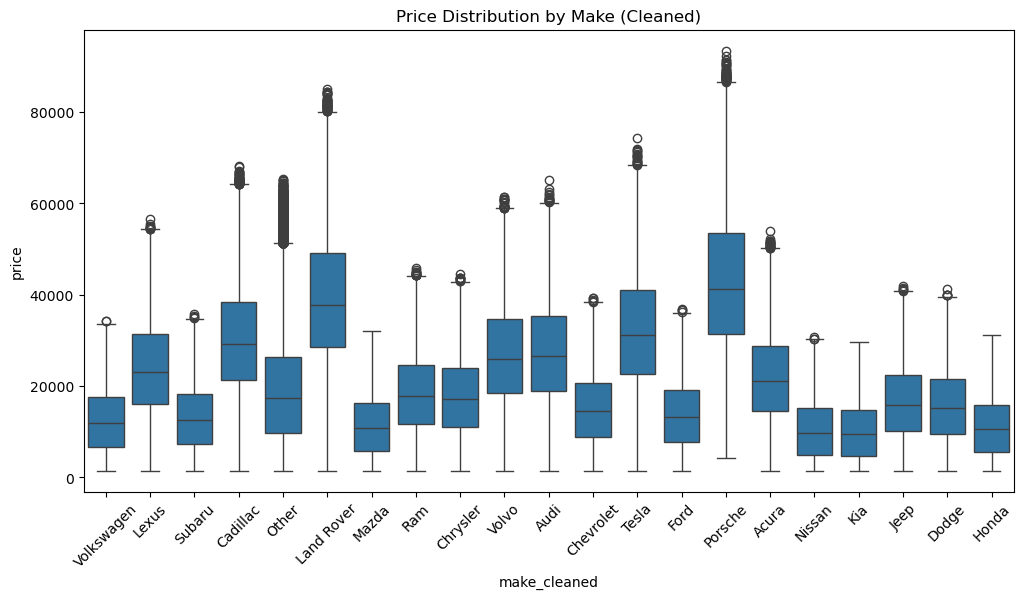

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.boxplot(x='make_cleaned', y='price', data=df)
plt.xticks(rotation=45)
plt.title("Price Distribution by Make (Cleaned)")
plt.show()


In [77]:
#Select Top 3–4 Models per Make
def get_top_models(sub_df, n=4):
    return sub_df['model'].value_counts().head(n).index.tolist()


In [78]:
top_models_per_make = {}

for make in top_makes:
    top_models_per_make[make] = get_top_models(
        df[df['make_cleaned'] == make], n=4
    )


In [79]:
#Create model_cleaned column
def clean_model(row):
    make = row['make_cleaned']
    model = row['model']
    
    if make in top_models_per_make:
        if model in top_models_per_make[make]:
            return model
        else:
            return "Other_Model"
    else:
        return "Other_Model"

df['model_cleaned'] = df.apply(clean_model, axis=1)


In [80]:
df[['make_cleaned', 'model_cleaned']].head(10)


,make_cleaned,model_cleaned
0,Volkswagen,Other_Model
1,Lexus,RX
2,Subaru,Crosstrek
3,Cadillac,Lyriq
4,Other,Other_Model
5,Land Rover,Defender
6,Mazda,Mazda3
7,Volkswagen,Atlas
8,Ram,2500
9,Chrysler,300


In [81]:
df['model_cleaned'].value_counts().head(10)


model_cleaned
Other_Model    261736
300             20202
Pacifica        19857
2500            13539
3500            13464
Charger         13457
Defender        13423
Range Rover     13389
Durango         13339
Discovery       13321
Name: count, dtype: int64

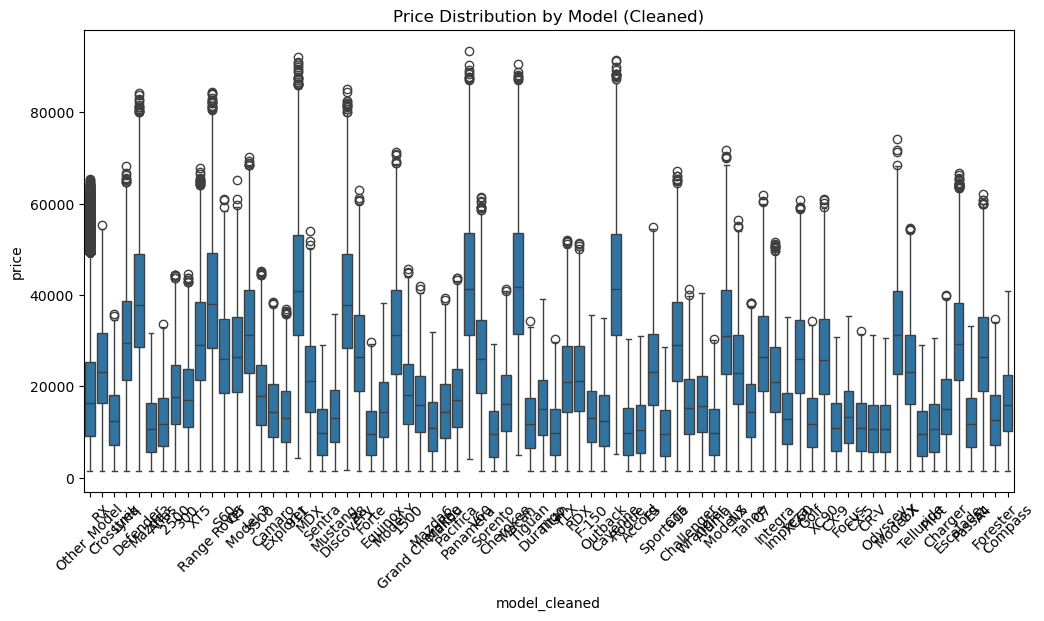

In [82]:
plt.figure(figsize=(12,6))
x=df['model_cleaned'].value_counts().head(15)
sns.boxplot(x='model_cleaned', y='price', data=df)
plt.xticks(rotation=45)
plt.title("Price Distribution by Model (Cleaned)")
plt.show()


## Outliers Handling 


In [83]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_cols


Index(['year', 'mileage', 'engine_hp', 'owner_count', 'vehicle_age',
       'mileage_per_year', 'brand_popularity', 'price'],
      dtype='object')

In [84]:
def get_outlier_summary(df):
    num_df = df.select_dtypes(include=['number'])
    summary_list = []
    for col in num_df.columns:
        Q1 = num_df[col].quantile(0.25)
        Q3 = num_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR
        outliers = num_df[(num_df[col] < lower_limit) | (num_df[col] > upper_limit)]
        summary_list.append({
            'Column': col,
            'Outlier Count': len(outliers),
            'Percentage (%)': round((len(outliers) / len(num_df)) * 100, 2),
            'Min': num_df[col].min(),
            'Max': num_df[col].max()
        })
    return pd.DataFrame(summary_list)

# Capture 'before' snapshots
price_before = df['price'].copy()
pop_before = df['brand_popularity'].copy()
before_report = get_outlier_summary(df)

In [85]:
before_report = get_outlier_summary(df)
before_report

,Column,Outlier Count,Percentage (%),Min,Max
0,year,6029,0.60,2000.000000,2025.000000
1,mileage,0,0.00,500.000000,300000.000000
2,engine_hp,1381,0.14,90.000000,581.000000
3,owner_count,0,0.00,1.000000,5.000000
4,vehicle_age,6029,0.60,1.000000,25.000000
5,mileage_per_year,4163,0.42,33.333333,55391.000000
6,brand_popularity,39318,3.93,0.039318,0.040484
7,price,25524,2.55,1500.000000,93422.090000


In [86]:
# 1. Gentle Capping for Physical & Target Variables (0.5% - 99.5%)
# 1. Gentle Capping for Price and HP (Both ends)
for col in ['price', 'engine_hp']:
    df[col] = df[col].clip(lower=df[col].quantile(0.005), upper=df[col].quantile(0.995))

# 2. ONE-SIDED Capping for Mileage (Keep the 33km/year, but cap the 55k km/year)
# We only clip the upper end here
df['mileage_per_year'] = df['mileage_per_year'].clip(upper=df['mileage_per_year'].quantile(0.995))

# 3. Log Transform Popularity (Keep as is)
df['brand_popularity'] = np.log1p(df['brand_popularity'])

# Generate final report
after_report = get_outlier_summary(df)
print("Outlier handling complete: Capping applied to Price/HP/Mileage; Log Transform applied to Popularity.")

Outlier handling complete: Capping applied to Price/HP/Mileage; Log Transform applied to Popularity.


In [87]:
# 1. Comparison Report
cols_to_show = ['price', 'engine_hp', 'mileage_per_year', 'brand_popularity']
print("\n--- BEFORE vs AFTER COMPARISON ---")
print("\nBEFORE:")
print(before_report[before_report['Column'].isin(cols_to_show)])
print("\nAFTER:")
print(after_report[after_report['Column'].isin(cols_to_show)])


--- BEFORE vs AFTER COMPARISON ---

BEFORE:
             Column  Outlier Count  Percentage (%)          Min           Max
2         engine_hp           1381            0.14    90.000000    581.000000
5  mileage_per_year           4163            0.42    33.333333  55391.000000
6  brand_popularity          39318            3.93     0.039318      0.040484
7             price          25524            2.55  1500.000000  93422.090000

AFTER:
             Column  Outlier Count  Percentage (%)          Min           Max
2         engine_hp              0            0.00    90.000000    489.000000
5  mileage_per_year              0            0.00    33.333333  30483.001000
6  brand_popularity          39318            3.93     0.038565      0.039686
7             price          25524            2.55  1500.000000  68437.531500


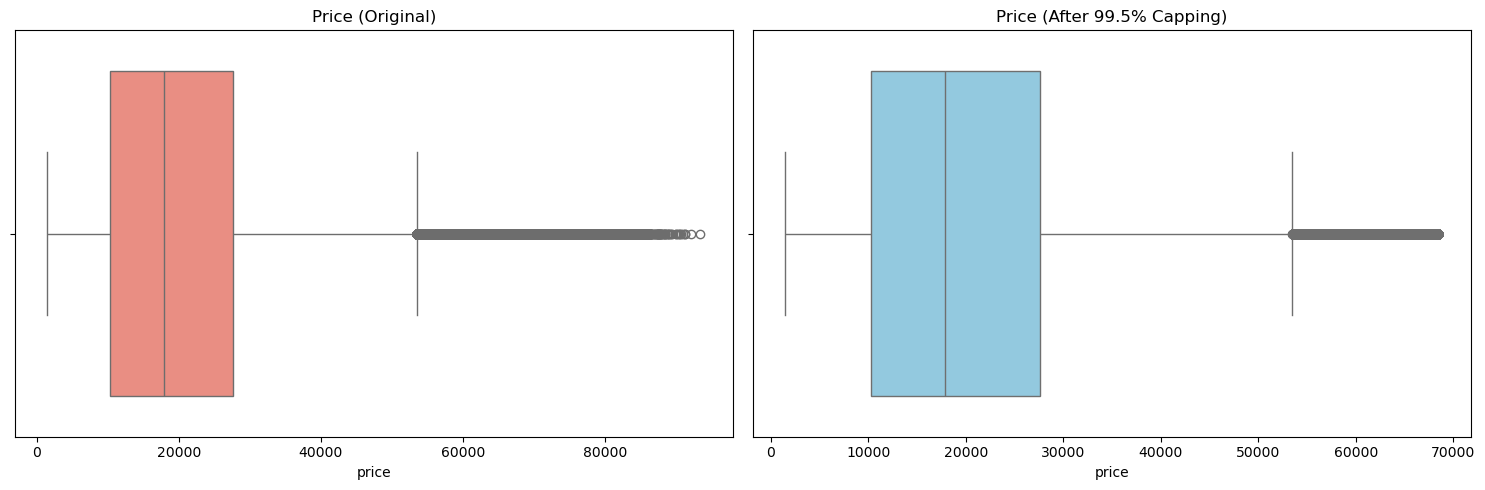

In [88]:
# Visual Validation
plt.figure(figsize=(15, 5))

# Price Boxplot
plt.subplot(1, 2, 1)
sns.boxplot(x=price_before, color='salmon')
plt.title("Price (Original)")

plt.subplot(1, 2, 2)
sns.boxplot(x=df['price'], color='skyblue')
plt.title("Price (After 99.5% Capping)")

plt.tight_layout()
plt.show()

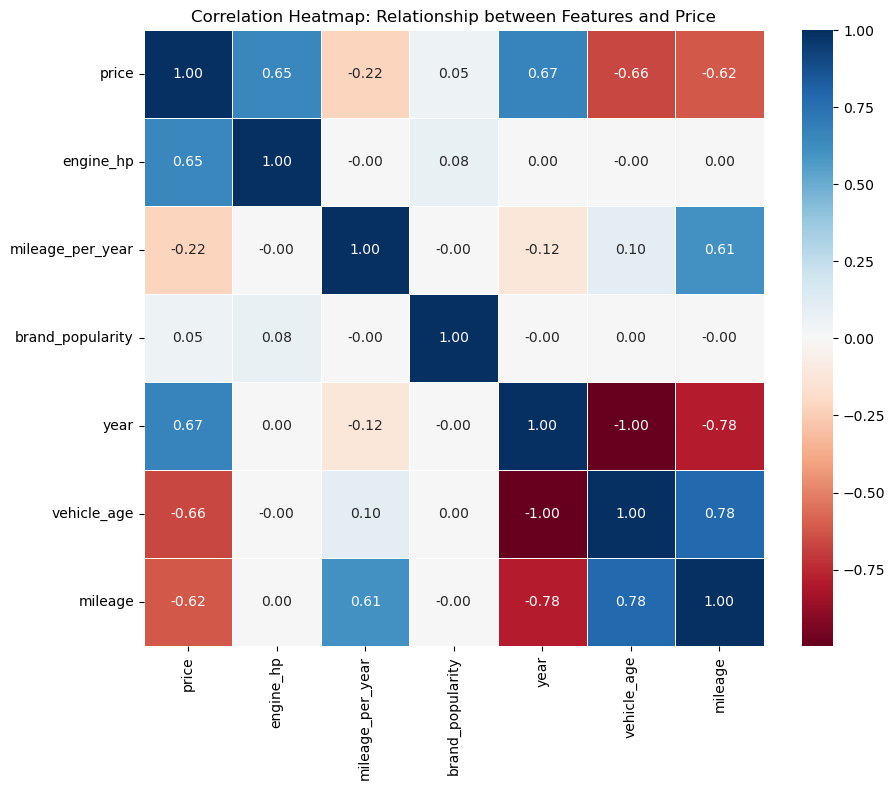

Correlation of features with Price:
price               1.000000
year                0.666505
engine_hp           0.654065
brand_popularity    0.054701
mileage_per_year   -0.219591
mileage            -0.620509
vehicle_age        -0.664772
Name: price, dtype: float64


In [89]:
# 1. Calculate the correlation matrix
# We focus on the relationship between all numerical columns
corr_matrix = df[['price', 'engine_hp', 'mileage_per_year', 'brand_popularity', 'year', 'vehicle_age','mileage']].corr()

# 2. Plot the Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap: Relationship between Features and Price")
plt.show()

# 3. Print the specific correlation with Target
print("Correlation of features with Price:")
print(corr_matrix['price'].sort_values(ascending=False))

## PRACTICAL (Encoding Strategy)

In [90]:
df['condition'].value_counts()


condition
Good         499683
Excellent    400373
Fair          99944
Name: count, dtype: int64

In [91]:
#Create ordinal mapping
condition_map = {
    'Fair': 1,
    'Good': 2,
    'Excellent': 3
}

In [92]:
#Apply ordinal encoding
df['condition_encoded'] = df['condition'].map(condition_map)

In [93]:
#Validate encoding (VERY IMPORTANT)
df[['condition', 'condition_encoded']].head(10)

,condition,condition_encoded
0,Excellent,3
1,Good,2
2,Excellent,3
3,Good,2
4,Excellent,3
5,Excellent,3
6,Good,2
7,Excellent,3
8,Good,2
9,Good,2


In [94]:
df['condition_encoded'].value_counts()

condition_encoded
2    499683
3    400373
1     99944
Name: count, dtype: int64

In [95]:
#Drop original column (clean step)
df.drop('condition', axis=1, inplace=True)

In [96]:
df.shape

(1000000, 22)

In [97]:
#Identify columns to one-hot encode


In [98]:
onehot_cols = [
    'make_cleaned',
    'model_cleaned',
    'fuel_type',
    'transmission'
]

onehot_cols


['make_cleaned', 'model_cleaned', 'fuel_type', 'transmission']

In [99]:
#apply encoding
df_encoded = pd.get_dummies(
    df,
    columns=onehot_cols,
    drop_first=True
)

In [100]:
df.shape, df_encoded.shape

((1000000, 22), (1000000, 116))

In [101]:
df_encoded.columns[:20]


Index(['make', 'model', 'year', 'mileage', 'engine_hp', 'drivetrain',
       'body_type', 'exterior_color', 'interior_color', 'owner_count',
       'accident_history', 'seller_type', 'trim', 'vehicle_age',
       'mileage_per_year', 'brand_popularity', 'price', 'condition_encoded',
       'make_cleaned_Audi', 'make_cleaned_Cadillac'],
      dtype='object')

In [102]:
df_encoded.columns[-20:]


Index(['model_cleaned_RX', 'model_cleaned_Range Rover', 'model_cleaned_Rogue',
       'model_cleaned_S60', 'model_cleaned_Sentra', 'model_cleaned_Sorento',
       'model_cleaned_Sportage', 'model_cleaned_TLX', 'model_cleaned_Tahoe',
       'model_cleaned_Telluride', 'model_cleaned_Tiguan',
       'model_cleaned_Titan', 'model_cleaned_V60', 'model_cleaned_Wrangler',
       'model_cleaned_XC60', 'model_cleaned_XC90', 'model_cleaned_XT5',
       'fuel_type_Electric', 'fuel_type_Gasoline', 'transmission_Manual'],
      dtype='object')

In [103]:
df_encoded.isnull().sum().sum()


np.int64(0)

In [104]:
df_encoded.head()


,make,model,year,mileage,engine_hp,drivetrain,body_type,exterior_color,interior_color,owner_count,...,model_cleaned_Tiguan,model_cleaned_Titan,model_cleaned_V60,model_cleaned_Wrangler,model_cleaned_XC60,model_cleaned_XC90,model_cleaned_XT5,fuel_type_Electric,fuel_type_Gasoline,transmission_Manual
0,Volkswagen,Jetta,2016,183903,173,RWD,Sedan,Blue,Brown,5,...,False,False,False,False,False,False,False,True,False,True
1,Lexus,RX,2010,236643,352,FWD,Sedan,Silver,Beige,5,...,False,False,False,False,False,False,False,False,True,True
2,Subaru,Crosstrek,2016,103199,188,AWD,Sedan,Silver,Beige,5,...,False,False,False,False,False,False,False,False,False,False
3,Cadillac,Lyriq,2016,118889,338,AWD,SUV,Black,Gray,3,...,False,False,False,False,False,False,False,False,True,True
4,Toyota,Highlander,2018,204170,196,FWD,Sedan,Red,Brown,5,...,False,False,False,False,False,False,False,False,False,True


In [105]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Columns: 116 entries, make to transmission_Manual
dtypes: bool(98), float64(3), int64(6), object(9)
memory usage: 230.8+ MB


In [106]:
#Identify remaining object columns
df_encoded.select_dtypes(include='object').columns

Index(['make', 'model', 'drivetrain', 'body_type', 'exterior_color',
       'interior_color', 'accident_history', 'seller_type', 'trim'],
      dtype='object')

In [107]:
#drop object columns
df_final = df_encoded.drop(
    columns=df_encoded.select_dtypes(include='object').columns
)

In [108]:
df_final.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Columns: 107 entries, year to transmission_Manual
dtypes: bool(98), float64(3), int64(6)
memory usage: 162.1 MB


In [109]:
df_final.isnull().sum()

year                   0
mileage                0
engine_hp              0
owner_count            0
vehicle_age            0
                      ..
model_cleaned_XC90     0
model_cleaned_XT5      0
fuel_type_Electric     0
fuel_type_Gasoline     0
transmission_Manual    0
Length: 107, dtype: int64

In [110]:
df_final.shape


(1000000, 107)

In [111]:
#Separate Features (X) and Target (y)

In [112]:
X = df_final.drop('price', axis=1)
y = df_final['price']

In [113]:
X.shape , y.shape

((1000000, 106), (1000000,))

## Train–Test Split

In [114]:
from sklearn.model_selection import train_test_split


In [115]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)


In [116]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((800000, 106), (200000, 106), (800000,), (200000,))

In [117]:
X_train.head()



,year,mileage,engine_hp,owner_count,vehicle_age,mileage_per_year,brand_popularity,condition_encoded,make_cleaned_Audi,make_cleaned_Cadillac,...,model_cleaned_Tiguan,model_cleaned_Titan,model_cleaned_V60,model_cleaned_Wrangler,model_cleaned_XC60,model_cleaned_XC90,model_cleaned_XT5,fuel_type_Electric,fuel_type_Gasoline,transmission_Manual
566853,2025,4510,117,1,1,4510.000000,0.039458,3,False,False,...,False,False,False,False,False,False,False,False,True,False
382311,2019,92270,349,5,6,15378.333333,0.039074,1,False,True,...,False,False,False,False,False,False,True,False,False,False
241519,2016,162712,143,3,9,18079.111111,0.039458,3,False,False,...,False,False,False,False,False,False,False,False,True,True
719220,2016,97110,147,4,9,10790.000000,0.039442,1,False,False,...,False,False,False,False,False,False,False,False,True,True
905718,2016,146077,225,5,9,16230.777778,0.039363,3,False,False,...,False,False,False,False,False,False,False,False,False,False


In [118]:
y_train.head()

566853    24765.97
382311    30853.12
241519     6700.78
719220     9628.83
905718    13962.99
Name: price, dtype: float64

## Model Building  -- > Linear Regression 

In [119]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [120]:
#Initialize Linear Regression model
lr_model = LinearRegression()

In [121]:
# Training the mode
lr_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [122]:
#Make predictions on TEST data
y_pred_lr = lr_model.predict(X_test)

In [123]:
#Mean Absolute Error (MAE)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
#Root Mean Squared Error (RMSE)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
#R² Score
r2_lr = r2_score(y_test, y_pred_lr)

In [124]:
print("Linear Regression Performance:")
print(f"MAE  : {mae_lr}")
print(f"RMSE : {rmse_lr}")
print(f"R²   : {r2_lr}")

Linear Regression Performance:
MAE  : 2651.0717090237317
RMSE : 3758.982578808227
R²   : 0.9229354678210282


In [125]:
#Check prediction range
y_pred_lr[:10]

array([17934.12087991, 50412.22429819, 32808.18059816, 17332.0425212 ,
       20970.77034168, 34894.08893246,  7785.9980347 , 17416.76923436,
       28293.7541306 , 20245.63266873])

In [126]:
#Compare few actual vs predicted values
comparison = pd.DataFrame({
    'Actual Price': y_test[:10].values,
    'Predicted Price': y_pred_lr[:10]
})

comparison

,Actual Price,Predicted Price
0,19226.82,17934.120880
1,60435.02,50412.224298
2,28708.28,32808.180598
3,18938.64,17332.042521
4,18487.37,20970.770342
5,38419.94,34894.088932
6,9279.05,7785.998035
7,16740.43,17416.769234
8,24464.90,28293.754131
9,19586.85,20245.632669


### Decision Tree

In [140]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [141]:
dt_model = DecisionTreeRegressor(
    max_depth=12,
    min_samples_split=50,
    min_samples_leaf=20,
    random_state=42
)


In [142]:
#Train the Decision Tree
dt_model.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,12
,min_samples_split,50
,min_samples_leaf,20
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [143]:
#Predict on TEST data
y_pred_dt = dt_model.predict(X_test)

In [144]:
#Evaluate Decision Tree performance
mae_dt  = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt   = r2_score(y_test, y_pred_dt)

print("Decision Tree Performance:")
print(f"MAE  : {mae_dt}")
print(f"RMSE : {rmse_dt}")
print(f"R²   : {r2_dt}")

Decision Tree Performance:
MAE  : 1796.2615051127912
RMSE : 2544.4678012814643
R²   : 0.9646891770368315


In [145]:
comparison_dt = pd.DataFrame({
    'Actual Price': y_test[:10].values,
    'Predicted Price (DT)': y_pred_dt[:10]
})

comparison_dt


,Actual Price,Predicted Price (DT)
0,19226.82,19458.594711
1,60435.02,58545.116234
2,28708.28,30471.009257
3,18938.64,16766.028686
4,18487.37,20974.371955
5,38419.94,37326.254614
6,9279.05,5717.204672
7,16740.43,15373.230205
8,24464.90,25343.977754
9,19586.85,19806.166523


In [146]:
### overfitting checking
train_r2 = dt_model.score(X_train, y_train)
test_r2 = dt_model.score(X_test, y_test)

train_r2, test_r2

(0.9661071908416836, 0.9646891770368315)

### Random Forest

In [147]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [148]:
#Initialize Random Forest (controlled, safe)
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=12,
    min_samples_split=50,
    min_samples_leaf=20,
    random_state=42,
    n_jobs=-1
)

In [149]:
#Train the Random Forest
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,12
,min_samples_split,50
,min_samples_leaf,20
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [150]:
#Predict on TEST data
y_pred_rf = rf_model.predict(X_test)

In [151]:
#Evaluate Random Forest performance
mae_rf  = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf   = r2_score(y_test, y_pred_rf)

print("Random Forest Performance:")
print(f"MAE  : {mae_rf}")
print(f"RMSE : {rmse_rf}")
print(f"R²   : {r2_rf}")

Random Forest Performance:
MAE  : 1673.821582671768
RMSE : 2402.4775997689835
R²   : 0.9685201528767533


In [154]:
comparison_rf = pd.DataFrame({
    'Actual Price': y_test[:10].values,
    'Predicted Price (RF)': y_pred_rf[:10]
})

comparison_rf

,Actual Price,Predicted Price (RF)
0,19226.82,18786.753134
1,60435.02,58035.293533
2,28708.28,30526.977502
3,18938.64,16480.399554
4,18487.37,20876.279943
5,38419.94,38145.097278
6,9279.05,8572.412971
7,16740.43,16975.750215
8,24464.90,25350.538275
9,19586.85,19831.779590


In [155]:
### overfitting checking
train_r2 = rf_model.score(X_train, y_train)
test_r2 = rf_model.score(X_test, y_test)

train_r2, test_r2

(0.9695974005357714, 0.9685201528767533)

#### Hyperparameter Tunning to random forest

In [156]:
from sklearn.model_selection import RandomizedSearchCV

# 1. Define the parameters we want to try
param_distributions = {
    'n_estimators': [100, 150, 200],
    'max_depth': [12, 15, 20],
    'min_samples_split': [30, 50, 70],
    'max_features': ['sqrt', None] # None means all features
}

In [157]:
# 2. Initialize the Randomized Search
# n_iter=5 means it will try 5 random combinations from the list above
rf_random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42, n_jobs=-1),
    param_distributions=param_distributions,
    n_iter=5, 
    cv=3, # 3-fold cross validation
    verbose=2,
    random_state=42,
    scoring='r2'
)

In [158]:
# 3. Fit the search (this might take a few minutes because your data is large)
print("Starting Hyperparameter Tuning...")
rf_random_search.fit(X_train, y_train)

Starting Hyperparameter Tuning...
Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END max_depth=15, max_features=sqrt, min_samples_split=30, n_estimators=150; total time=  57.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_split=30, n_estimators=150; total time=  57.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_split=30, n_estimators=150; total time=  57.6s
[CV] END max_depth=20, max_features=None, min_samples_split=50, n_estimators=150; total time= 6.0min
[CV] END max_depth=20, max_features=None, min_samples_split=50, n_estimators=150; total time= 6.2min
[CV] END max_depth=20, max_features=None, min_samples_split=50, n_estimators=150; total time= 5.8min
[CV] END max_depth=20, max_features=None, min_samples_split=50, n_estimators=100; total time= 4.0min
[CV] END max_depth=20, max_features=None, min_samples_split=50, n_estimators=100; total time= 3.6min
[CV] END max_depth=20, max_features=None, min_samples_split=50, n_estimators=100; total time= 3.6m

,estimator,RandomForestR...ndom_state=42)
,param_distributions,"{'max_depth': [12, 15, ...], 'max_features': ['sqrt', None], 'min_samples_split': [30, 50, ...], 'n_estimators': [100, 150, ...]}"
,n_iter,5
,scoring,'r2'
,n_jobs,None
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [159]:
# 4. Get the best model
best_rf_model = rf_random_search.best_estimator_
y_pred_rf_tuned = best_rf_model.predict(X_test)

In [160]:
# 5. Evaluate Tuned Model
mae_rf_tuned = mean_absolute_error(y_test, y_pred_rf_tuned)
rmse_rf_tuned = np.sqrt(mean_squared_error(y_test, y_pred_rf_tuned))
r2_rf_tuned = r2_score(y_test, y_pred_rf_tuned)

print("\nBest Parameters Found:", rf_random_search.best_params_)


Best Parameters Found: {'n_estimators': 150, 'min_samples_split': 50, 'max_features': None, 'max_depth': 20}


In [161]:
# Create Comparison Table
performance_comparison = pd.DataFrame({
    'Metric': ['MAE', 'RMSE', 'R² Score'],
    'Original RF (Basic)': [mae_rf, rmse_rf, r2_rf],
    'Tuned RF (Improved)': [mae_rf_tuned, rmse_rf_tuned, r2_rf_tuned]
})

# Calculate improvement percentage
performance_comparison['Improvement %'] = (
    (performance_comparison['Original RF (Basic)'] - performance_comparison['Tuned RF (Improved)']) 
    / performance_comparison['Original RF (Basic)'] * 100
)

# Note: For R2, higher is better, so the calculation is flipped
performance_comparison.iloc[2, 3] = ((r2_rf_tuned - r2_rf) / r2_rf) * 100

print("Final Evaluation Comparison:")
print(performance_comparison)

Final Evaluation Comparison:
     Metric  Original RF (Basic)  Tuned RF (Improved)  Improvement %
0       MAE          1673.821583          1396.382460      16.575191
1      RMSE          2402.477600          2122.919874      11.636226
2  R² Score             0.968520             0.975420       0.712416


### XgBoost

In [164]:
from xgboost import XGBRegressor
# 1. Initialize XGBoost
# We use a lower learning_rate for better precision
xgb_model = XGBRegressor(
    n_estimators=1000, 
    learning_rate=0.05,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    n_jobs=-1,
    early_stopping_rounds=10,
    random_state=42
)

In [165]:
# 2. Fit with Early Stopping
# This stops training if the validation score doesn't improve for 10 rounds
# The model already knows to stop early because we defined it above.
xgb_model.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    verbose=100 
)

[0]	validation_0-rmse:12907.73392
[100]	validation_0-rmse:2192.40801
[200]	validation_0-rmse:2082.89268
[300]	validation_0-rmse:2066.12766
[400]	validation_0-rmse:2063.40594
[443]	validation_0-rmse:2063.12685


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,10
,enable_categorical,False
,eval_metric,None


In [166]:
# 3. Predict and Evaluate
y_pred_xgb = xgb_model.predict(X_test)

In [167]:
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"\nXGBoost Performance:")
print(f"MAE  : {mae_xgb}")
print(f"RMSE  : {rmse_xgb}")
print(f"R²   : {r2_xgb}")


XGBoost Performance:
MAE  : 1343.6795624206513
RMSE  : 2063.046643109953
R²   : 0.9767869602861706


In [168]:
comparison_xgb = pd.DataFrame({
    'Actual Price': y_test[:10].values,
    'Predicted Price (RF)': y_pred_xgb[:10]
})

comparison_xgb

,Actual Price,Predicted Price (RF)
0,19226.82,18593.453125
1,60435.02,57659.234375
2,28708.28,31001.716797
3,18938.64,16970.464844
4,18487.37,19104.226562
5,38419.94,37537.781250
6,9279.05,9278.636719
7,16740.43,16166.165039
8,24464.90,25508.160156
9,19586.85,18218.542969


### Hypertunned the XgbBoost 

In [169]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor

In [170]:
# 1. Define XGBoost Tuning Grid
xgb_param_dist = {
    'n_estimators': [200, 500, 800],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [6, 8, 10],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

In [171]:
# 2. Initialize RandomizedSearch
xgb_tune = RandomizedSearchCV(
    XGBRegressor(random_state=42, n_jobs=-1),
    param_distributions=xgb_param_dist,
    n_iter=5, 
    cv=3,
    verbose=2,
    random_state=42,
    scoring='r2'
)

In [172]:
print("Tuning XGBoost... (This may take time due to 1M rows)")
xgb_tune.fit(X_train, y_train)

Tuning XGBoost... (This may take time due to 1M rows)
Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=10, n_estimators=800, subsample=0.7; total time= 1.4min
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=10, n_estimators=800, subsample=0.7; total time= 1.5min
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=10, n_estimators=800, subsample=0.7; total time= 1.5min
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=6, n_estimators=800, subsample=0.7; total time=  59.9s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=6, n_estimators=800, subsample=0.7; total time=  58.5s
[CV] END colsample_bytree=0.7, learning_rate=0.01, max_depth=6, n_estimators=800, subsample=0.7; total time=  57.8s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimators=800, subsample=0.9; total time=  46.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=8, n_estimat

,estimator,"XGBRegressor(...ree=None, ...)"
,param_distributions,"{'colsample_bytree': [0.7, 0.8, ...], 'learning_rate': [0.01, 0.05, ...], 'max_depth': [6, 8, ...], 'n_estimators': [200, 500, ...], ...}"
,n_iter,5
,scoring,'r2'
,n_jobs,None
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [175]:
# 3. Get best XGBoost
best_xgb = xgb_tune.best_estimator_
y_pred_xgb_tuned = best_xgb.predict(X_test)

# 4. Metrics
mae_xgb_tuned = mean_absolute_error(y_test, y_pred_xgb_tuned)
rmse_xgb_tuned = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuned))
r2_xgb_tuned = r2_score(y_test, y_pred_xgb_tuned)

print(f"\nBest XGB Params: {xgb_tune.best_params_}")
print(mae_xgb_tuned , rmse_xgb_tuned , r2_xgb_tuned)


Best XGB Params: {'subsample': 0.7, 'n_estimators': 800, 'max_depth': 10, 'learning_rate': 0.01, 'colsample_bytree': 0.7}
1348.9935713090233 2068.785834144251 0.9766576278952427


In [181]:
final_battle = pd.DataFrame({
    'Metric': ['RMSE','MAE', 'R² Score'],
    'Xgboost before tunned': [mae_xgb,rmse_xgb, r2_xgb],
    'Tuned XGBoost': [mae_xgb_tuned,rmse_xgb_tuned, r2_xgb_tuned]
})

print("The Final Showdown: Tuned RF vs Tuned XGBoost")
print(final_battle)

The Final Showdown: Tuned RF vs Tuned XGBoost
     Metric  Xgboost before tunned  Tuned XGBoost
0      RMSE            1343.679562    1348.993571
1       MAE            2063.046643    2068.785834
2  R² Score               0.976787       0.976658


In [179]:
# Final Comparison Table
# Note: Ensure mae_xgb_tuned and rmse_xgb_tuned were defined in your tuning step!
final_report = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Tuned Random Forest', 'XGBoost', 'XGBoost_tuned'],
    'MAE': [mae_lr, mae_dt, mae_rf_tuned, mae_xgb, mae_xgb_tuned],
    'RMSE': [rmse_lr, rmse_dt, rmse_rf_tuned, rmse_xgb, rmse_xgb_tuned],
    'R2 Score': [r2_lr, r2_dt, r2_rf_tuned, r2_xgb, r2_xgb_tuned]
})

# Sort by best performance (Highest R2 is usually the 'best' fit)
final_report = final_report.sort_values(by='R2 Score', ascending=False).reset_index(drop=True)

print("Final Project Leadership Board:")
print(final_report)

Final Project Leadership Board:
                 Model          MAE         RMSE  R2 Score
0              XGBoost  1343.679562  2063.046643  0.976787
1        XGBoost_tuned  1348.993571  2068.785834  0.976658
2  Tuned Random Forest  1396.382460  2122.919874  0.975420
3        Decision Tree  1796.261505  2544.467801  0.964689
4    Linear Regression  2651.071709  3758.982579  0.922935


## Model Saving

In [192]:
import joblib

# Save final XGBoost model
joblib.dump(xgb_model, "car_price_xgboost_final_model.joblib")



['car_price_xgboost_final_model.joblib']

In [193]:
#Save model feature order
joblib.dump(X_train.columns.tolist(), "model_features.joblib")

['model_features.joblib']

In [194]:
model_metadata = {
    "model_name": "XGBoost Regressor",
    "model_version": "v1.0",
    "selection_reason": "Best MAE and RMSE among all tested models",
    "mae": float(mae_xgb),
    "rmse": float(rmse_xgb),
    "r2_score": float(r2_xgb),
    "features_count": X_train.shape[1],
    "dataset_size": X_train.shape[0] + X_test.shape[0]
}

joblib.dump(model_metadata, "model_metadata.joblib")


['model_metadata.joblib']

In [195]:
# Load and test saved model
loaded_model = joblib.load("car_price_xgboost_final_model.joblib")
loaded_features = joblib.load("model_features.joblib")

sample_input = X_test.iloc[[0]]
prediction = loaded_model.predict(sample_input)

prediction


array([18593.453], dtype=float32)

In [196]:
sample_input = X_test.iloc[[0]]  # single row
sample_prediction = loaded_model.predict(sample_input)

sample_prediction


array([18593.453], dtype=float32)

In [197]:
import joblib
import pandas as pd

# Load trained model and feature list
model = joblib.load("car_price_xgboost_final_model.joblib")
feature_cols = joblib.load("model_features.joblib")


In [198]:
# Pick 5 random samples from test set
sample_X = X_test.sample(5, random_state=42)

# Actual prices
actual_prices = y_test.loc[sample_X.index]


In [199]:
sample_X = sample_X[feature_cols]


In [200]:
predicted_prices = model.predict(sample_X)


In [201]:
comparison_df = pd.DataFrame({
    "Actual Price": actual_prices.values,
    "Predicted Price": predicted_prices
})

comparison_df


,Actual Price,Predicted Price
0,18017.17,20039.988281
1,1500.00,1273.253784
2,10040.54,10767.717773
3,14361.97,14057.979492
4,18853.51,17521.833984


In [80]:
import xgboost
print(xgboost.__version__)

3.1.3


In [81]:
# from xgboost import XGBRegressor

# xgb_model = XGBRegressor(
#     n_estimators=300,
#     max_depth=6,
#     learning_rate=0.1,
#     subsample=0.8,
#     colsample_bytree=0.8,
#     random_state=42,
#     n_jobs=-1
# )

# xgb_model.fit(X_train, y_train)


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [82]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# import numpy as np

# y_pred = xgb_model.predict(X_test)

# mae = mean_absolute_error(y_test, y_pred)
# rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# r2 = r2_score(y_test, y_pred)

# mae, rmse, r2


(1379.4652926276788, np.float64(2119.0674600179764), 0.975939452269059)